# **Notebook 6.1: Line search**

This notebook investigates how to find the minimum of a 1D function using line search as described in Figure 6.10.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.


In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Let's create a simple 1D function
def loss_function(phi):
  return 1 - 0.5 * np.exp(-(phi-0.65)*(phi-0.65)/0.1) - 0.45 *np.exp(-(phi-0.35)*(phi-0.35)/0.02)

def draw_function(loss_function,a=None, b=None, c=None, d=None):
  # Plot the function
  phi_plot = np.arange(0,1,0.01)
  fig,ax = plt.subplots()
  ax.plot(phi_plot,loss_function(phi_plot),'r-')
  ax.set_xlim(0,1); ax.set_ylim(0,1)
  ax.set_xlabel(r'$\phi$'); ax.set_ylabel(r'$L[\phi]$')
  if a is not None and b is not None and c is not None and d is not None:
      plt.axvspan(a, d, facecolor='k', alpha=0.2)
      ax.plot([a,a],[0,1],'b-')
      ax.plot([b,b],[0,1],'b-')
      ax.plot([c,c],[0,1],'b-')
      ax.plot([d,d],[0,1],'b-')
  plt.show()


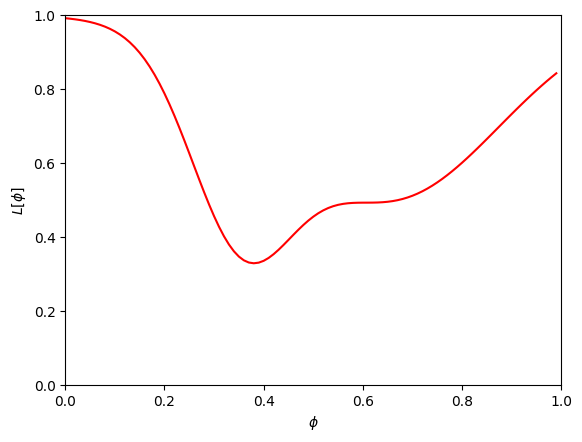

In [4]:
# Draw this function
draw_function(loss_function)

Now lets create a line search procedure to find the minimum in the range 0,1

In [6]:
def line_search(loss_function, thresh=.0001, max_iter = 10, draw_flag = False):

    # Initialize four points along the range we are going to search
    a = 0
    b = 0.33
    c = 0.66
    d = 1.0
    n_iter = 0

    # While we haven't found the minimum closely enough
    while np.abs(b-c) > thresh and n_iter < max_iter:
        # Increment iteration counter (just to prevent an infinite loop)
        n_iter = n_iter+1

        # Calculate all four points
        lossa = loss_function(a)
        lossb = loss_function(b)
        lossc = loss_function(c)
        lossd = loss_function(d)

        if draw_flag:
          draw_function(loss_function, a,b,c,d)

        print('Iter %d, a=%3.3f, b=%3.3f, c=%3.3f, d=%3.3f'%(n_iter, a,b,c,d))

        # Rule #1 If the HEIGHT at point A is less than the HEIGHT at points B, C, and D then halve values of B, C, and D
        # i.e. bring them closer to the original point
        # TODO✅ REPLACE THE BLOCK OF CODE BELOW WITH THIS RULE
        if lossa < lossb and lossa < lossc and lossa < lossd:
          b = (a + b)/2
          c = (a + c)/2
          d = (a + d)/2

        # Rule #2 If the HEIGHT at point b is less than the HEIGHT at point c then
        #                     point d becomes point c, and
        #                     point b becomes 1/3 between a and new d
        #                     point c becomes 2/3 between a and new d
        # TODO✅ REPLACE THE BLOCK OF CODE BELOW WITH THIS RULE
        elif lossb < lossc:
          d = c
          b = a + (d - a) * 1/3
          c = a + (d - a) * 2/3

        # Rule #3 If the HEIGHT at point c is less than the HEIGHT at point b then
        #                     point a becomes point b, and
        #                     point b becomes 1/3 between new a and d
        #                     point c becomes 2/3 between new a and d
        # TODO✅ REPLACE THE BLOCK OF CODE BELOW WITH THIS RULE
        elif lossc < lossb:
          a = b
          b = a + (d - a ) * 1/3
          c = a + 2*(d - a) * 2/3

    # TODO✅ -- FINAL SOLUTION IS AVERAGE OF B and C
    soln = (b + c)/2

    return soln

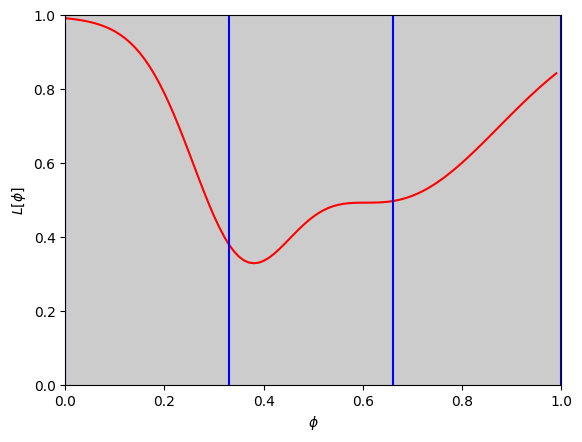

Iter 1, a=0.000, b=0.330, c=0.660, d=1.000


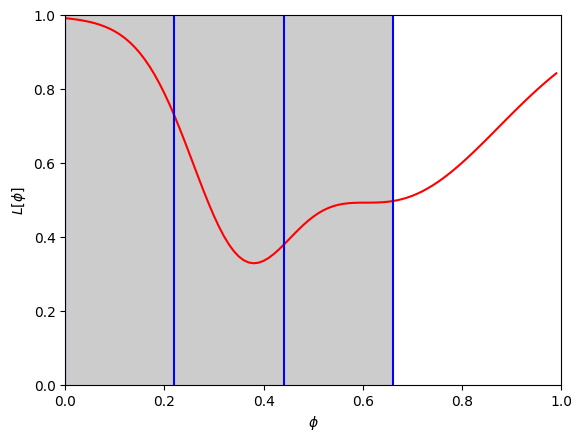

Iter 2, a=0.000, b=0.220, c=0.440, d=0.660


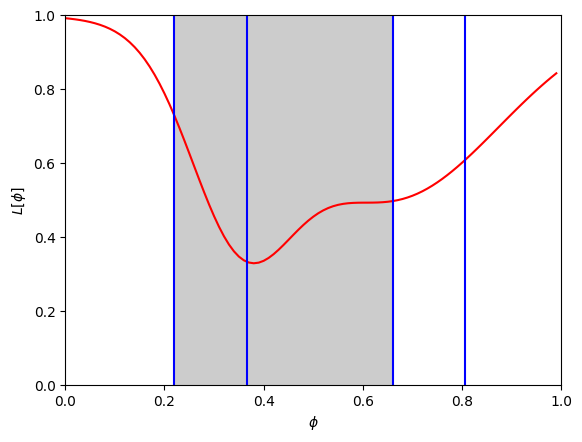

Iter 3, a=0.220, b=0.367, c=0.807, d=0.660


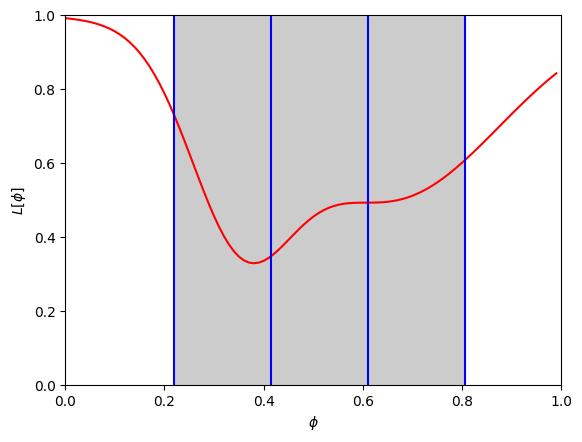

Iter 4, a=0.220, b=0.416, c=0.611, d=0.807


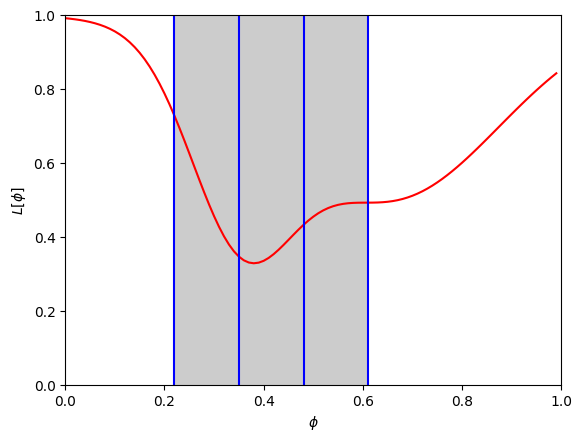

Iter 5, a=0.220, b=0.350, c=0.481, d=0.611


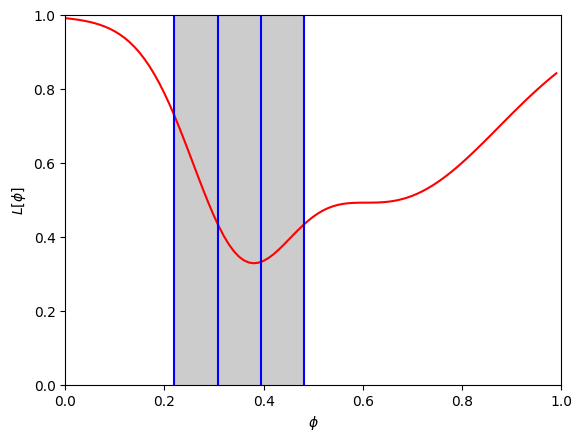

Iter 6, a=0.220, b=0.307, c=0.394, d=0.481


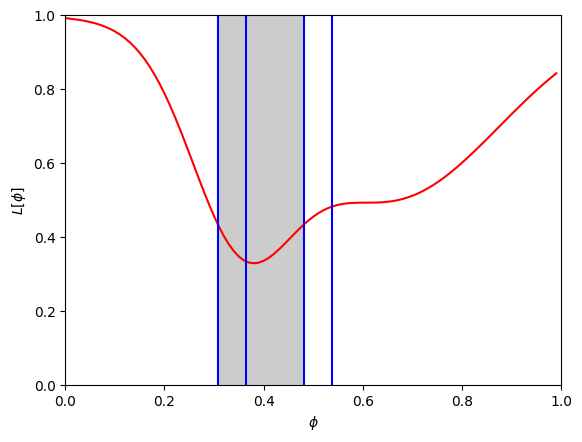

Iter 7, a=0.307, b=0.365, c=0.539, d=0.481


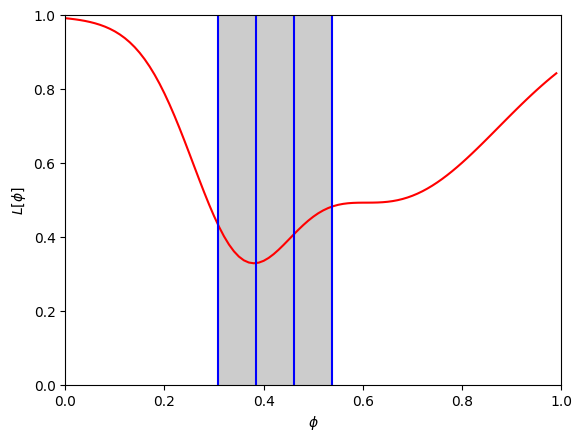

Iter 8, a=0.307, b=0.384, c=0.461, d=0.539


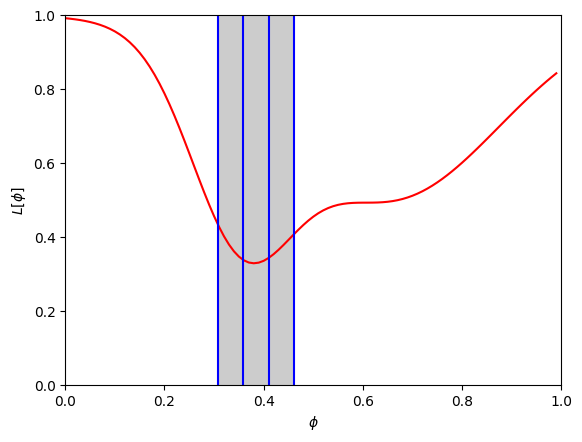

Iter 9, a=0.307, b=0.358, c=0.410, d=0.461


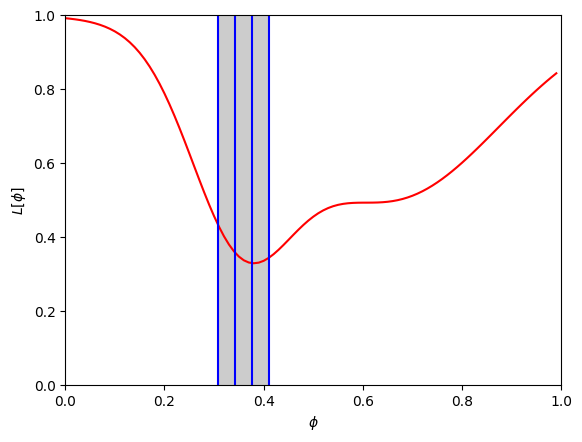

Iter 10, a=0.307, b=0.341, c=0.376, d=0.410
Soln = 0.398, loss = 0.334


In [7]:
soln = line_search(loss_function, draw_flag=True)
print('Soln = %3.3f, loss = %3.3f'%(soln,loss_function(soln)))